<a href="https://colab.research.google.com/github/xhesikam/WebtoonDataProject/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import matplotlib.pyplot as plt

In [37]:
import pandas as pd
df = pd.read_csv("/content/webtoon_originals_en.csv")
df.head()

,title_id,title,genre,authors,weekdays,length,subscribers,rating,views,likes,status,synopsis
0,8646,Apple Black,GRAPHIC_NOVEL,Odunze Oguguo,SUNDAY,4,9521,7.67,27874,2278,ONGOING,"In a world of sorcery, where items can become ..."
1,8645,The Duke is a Thug,ROMANCE,"FLAGCAT STUDIO,Juice™",WEDNESDAY,5,39343,6.55,195787,13364,ONGOING,"Carjacked and hit by a truck, Park Min Seo wak..."
2,8580,The Twins' New Life,FANTASY,"nicca,Suon(REDICE STUDIO),Aidera","TUESDAY,THURSDAY,SATURDAY",3,31422,6.54,214188,18067,ONGOING,Reborn as the prince and princess of a fantast...
3,8579,Daisy: How to Become the Duke's Fiancée,ROMANCE,"ALLYN,W(REDICE STUDIO),Lisabel","TUESDAY,THURSDAY,SATURDAY",3,23932,5.00,125581,7962,ONGOING,"Sweet, timid Daisy meets a tragic end after be..."
4,8578,Double Kill,ACTION,"Brandon Chen,UA983,Inspired Productions",TUESDAY,5,20435,8.04,72669,5335,ONGOING,Kasai was only a boy when he watched his paren...


In [38]:
df.describe() #no missing values

,title_id,length,subscribers,rating,views,likes
count,1686.000000,1686.000000,1.686000e+03,1686.000000,1.686000e+03,1.686000e+03
mean,4402.004745,61.525504,3.702828e+05,9.133654,3.087143e+07,2.403374e+06
std,2429.663229,103.731331,6.019590e+05,0.806341,9.529980e+07,6.025533e+06
min,64.000000,1.000000,4.278000e+03,3.850000,1.604100e+04,9.940000e+02
25%,2504.250000,7.000000,8.570925e+04,8.980000,2.140015e+06,2.011218e+05
50%,4432.000000,30.500000,1.741955e+05,9.370000,6.069940e+06,5.807890e+05
75%,6536.750000,74.000000,3.907622e+05,9.640000,2.141408e+07,1.980329e+06
max,8646.000000,1410.000000,7.511881e+06,10.000000,1.416199e+09,7.634777e+07


In [39]:
df = df.drop_duplicates()
len(df) #no duplicates

1686

In [40]:
df["weekdays"].unique()

array(['SUNDAY', 'WEDNESDAY', 'TUESDAY,THURSDAY,SATURDAY', 'TUESDAY',
       'MONDAY', 'THURSDAY', 'SATURDAY', 'FRIDAY', 'WEDNESDAY,SATURDAY',
       'THURSDAY,SUNDAY', 'MONDAY,THURSDAY', 'MONDAY,FRIDAY',
       'TUESDAY,FRIDAY', 'TUESDAY,SATURDAY',
       'MONDAY,TUESDAY,WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY',
       'MONDAY,WEDNESDAY,FRIDAY', 'MONDAY,THURSDAY,SATURDAY',
       'WEDNESDAY,SUNDAY', 'MONDAY,TUESDAY,WEDNESDAY,THURSDAY,SUNDAY',
       'WEDNESDAY,THURSDAY,FRIDAY,SATURDAY,SUNDAY', 'THURSDAY,SATURDAY',
       'MONDAY,SATURDAY', 'TUESDAY,THURSDAY', 'MONDAY,SUNDAY',
       'MONDAY,SATURDAY,SUNDAY', 'WEDNESDAY,THURSDAY',
       'TUESDAY,FRIDAY,SUNDAY', 'TUESDAY,SUNDAY', 'SATURDAY,SUNDAY',
       'WEDNESDAY,FRIDAY,SUNDAY', 'THURSDAY,FRIDAY',
       'TUESDAY,WEDNESDAY,THURSDAY,FRIDAY', 'FRIDAY,SATURDAY',
       'MONDAY,TUESDAY,FRIDAY', 'MONDAY,TUESDAY', 'TUESDAY,WEDNESDAY',
       'FRIDAY,SATURDAY,SUNDAY', 'WEDNESDAY,FRIDAY', 'MONDAY,WEDNESDAY',
       'MONDAY,TUESDAY,WEDNESD

In [41]:
df.dtypes
df["weekdays"] = df["weekdays"].astype("string")
df.dtypes

,0
title_id,int64
title,object
genre,object
authors,object
weekdays,string[python]
length,int64
subscribers,int64
rating,float64
views,int64
likes,int64


In [42]:
def day_fun(x):
  day_list = ["SUNDAY","MONDAY","TUESDAY","WEDNESDAY", "THURSDAY", "SATURDAY"]
  if x not in day_list:
    return "MULTIDAYS"
  else:
    return x

In [43]:
df["days"] = df["weekdays"].apply(day_fun)
df

,title_id,title,genre,authors,weekdays,length,subscribers,rating,views,likes,status,synopsis,days
0,8646,Apple Black,GRAPHIC_NOVEL,Odunze Oguguo,SUNDAY,4,9521,7.67,27874,2278,ONGOING,"In a world of sorcery, where items can become ...",SUNDAY
1,8645,The Duke is a Thug,ROMANCE,"FLAGCAT STUDIO,Juice™",WEDNESDAY,5,39343,6.55,195787,13364,ONGOING,"Carjacked and hit by a truck, Park Min Seo wak...",WEDNESDAY
2,8580,The Twins' New Life,FANTASY,"nicca,Suon(REDICE STUDIO),Aidera","TUESDAY,THURSDAY,SATURDAY",3,31422,6.54,214188,18067,ONGOING,Reborn as the prince and princess of a fantast...,MULTIDAYS
3,8579,Daisy: How to Become the Duke's Fiancée,ROMANCE,"ALLYN,W(REDICE STUDIO),Lisabel","TUESDAY,THURSDAY,SATURDAY",3,23932,5.00,125581,7962,ONGOING,"Sweet, timid Daisy meets a tragic end after be...",MULTIDAYS
4,8578,Double Kill,ACTION,"Brandon Chen,UA983,Inspired Productions",TUESDAY,5,20435,8.04,72669,5335,ONGOING,Kasai was only a boy when he watched his paren...,TUESDAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,68,Tales of the Unusual,HORROR,Seongdae Oh,SUNDAY,19,880424,9.66,163723540,10331957,COMPLETED,In dangerous urban legends and dark ancient my...,SUNDAY
1682,67,Knight Run,SF,Sungmin Kim,TUESDAY,170,97364,9.31,4968412,182805,COMPLETED,If you could be teleported down to the planet’...,TUESDAY
1683,66,The God of High School,ACTION,Yongje Park,FRIDAY,34,2949937,9.70,794505330,31730826,COMPLETED,Mori Jin is a high school student and Taekwond...,MULTIDAYS
1684,65,HIVE,THRILLER,kim kyusam,MONDAY,17,488546,9.65,68940852,3082750,COMPLETED,Gigantic oxygen-doped bees are attempting to d...,MONDAY


Choose 4 columns and do the following for each of these columns:
Plot the distribution of data in that column using an appropriate graph type.
Add a title and axes labels to the plot.
Add the plot to your webpage and write several sentences telling the reader what they should notice about the plot (ex. shape of distribution, outliers, skew, anything surprising, etc)


Text(0, 0.5, 'Count')

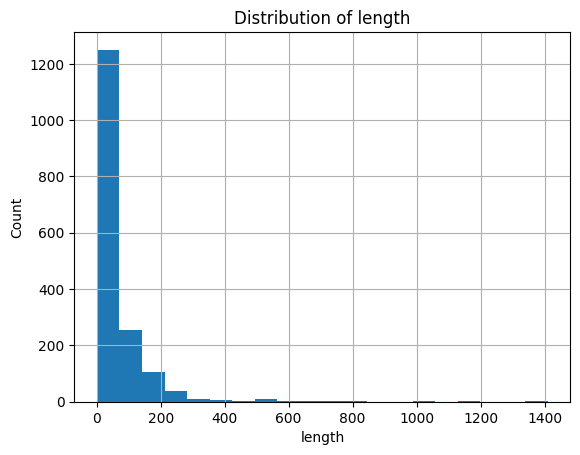

In [54]:
df["length"].hist(bins=20)
plt.title('Distribution of length')
plt.xlabel('length')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

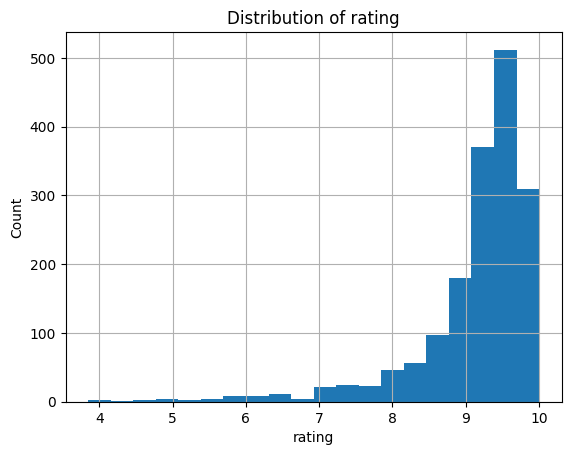

In [55]:
df["rating"].hist(bins=20)
plt.title('Distribution of rating')
plt.xlabel('rating')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

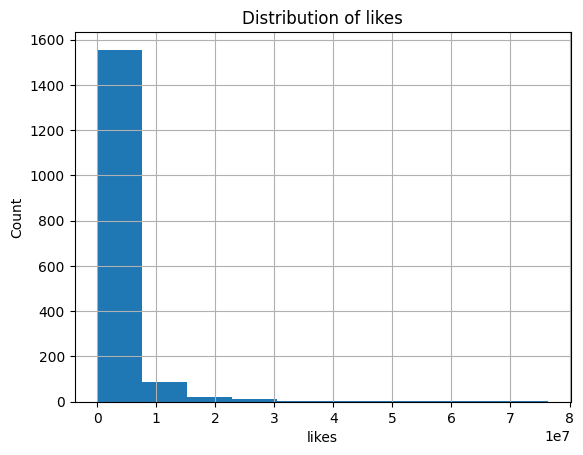

In [56]:
df["likes"].hist()
plt.title('Distribution of likes')
plt.xlabel('likes')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

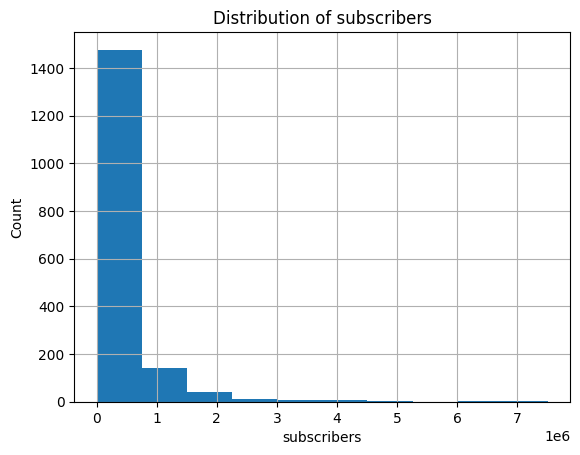

In [59]:
df["subscribers"].hist()
plt.title('Distribution of subscribers')
plt.xlabel('subscribers')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

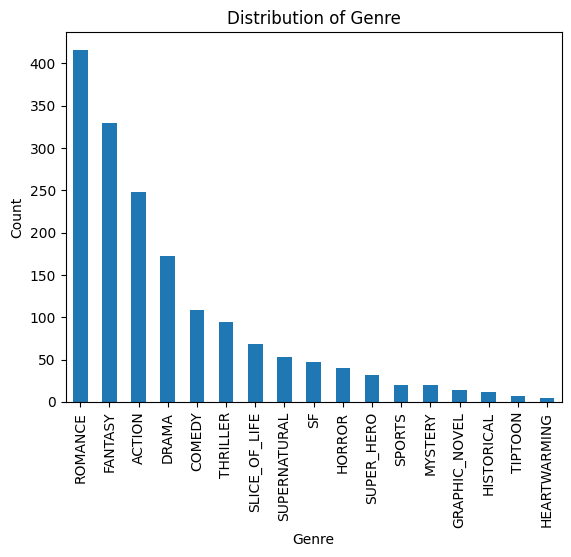

In [53]:
genre_counts = df['genre'].value_counts()
genre_counts.plot(kind='bar')
plt.title('Distribution of Genre')
plt.xlabel('Genre')
plt.ylabel('Count')

Create 2 plots by doing the following for each:
Choose two or more columns/variables, and create a plot visualizing their relationship.
Add a title and axes labels to the plot.
Add the plot to your webpage and write several sentences telling the reader what they should notice or conclude from this plot.


Text(0.5, 1.0, 'Subscribers vs views')

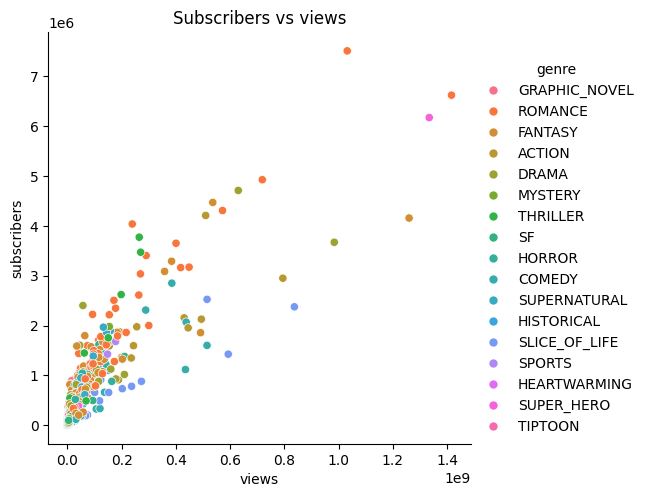

In [61]:
import seaborn as sns
sns.relplot(x="views", y = "subscribers", hue="genre",data=df)
plt.title('Subscribers vs views')

Text(0.5, 1.0, 'Total Views by Genre')

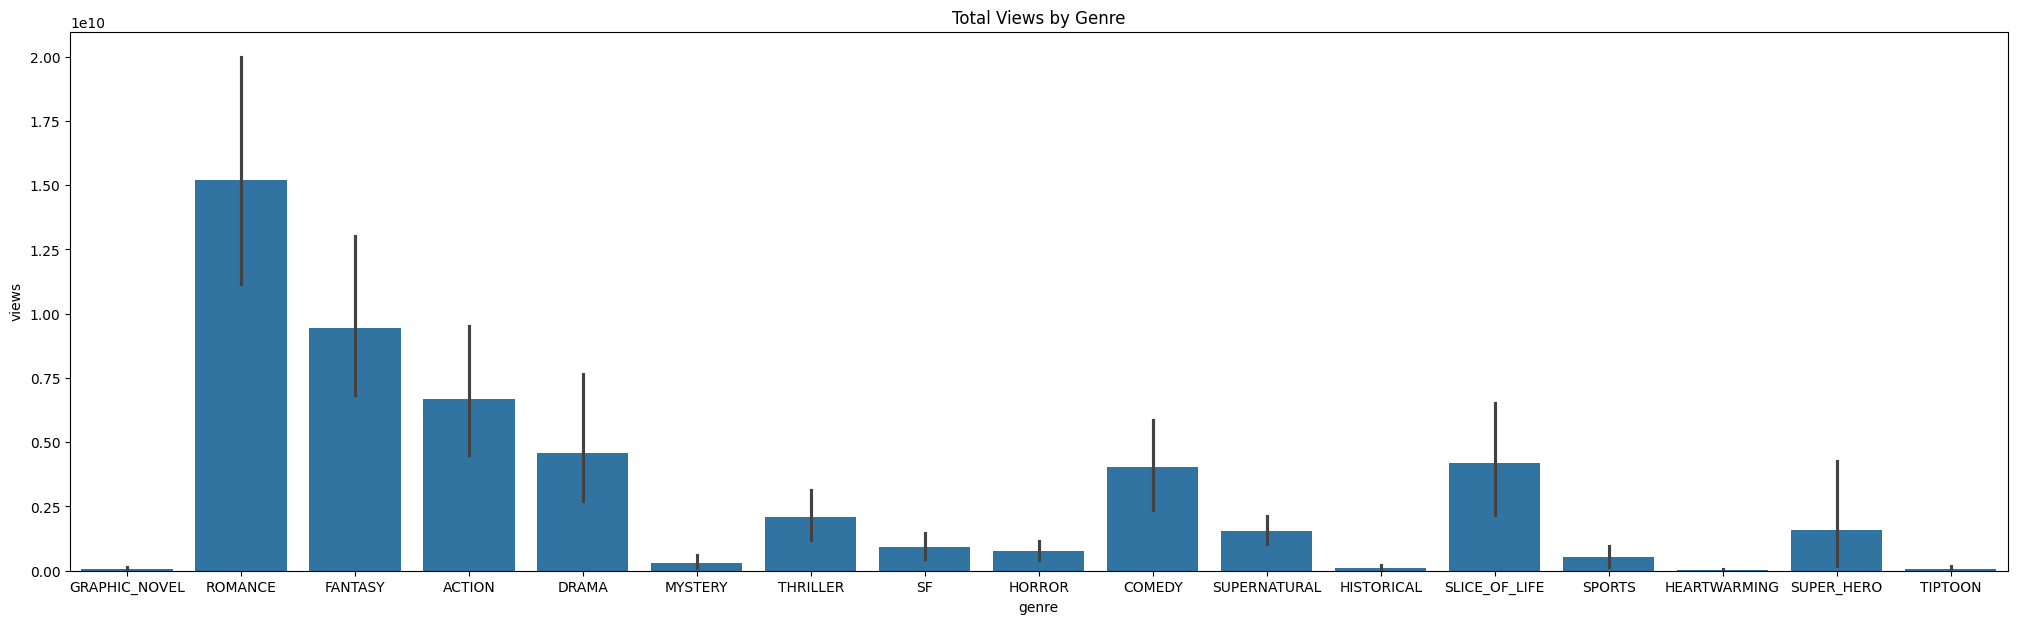

In [81]:
plt.figure(figsize=(25,7))
sns.barplot(x="genre", y="views", data=df, estimator = sum)
plt.title("Total Views by Genre")

